In [1]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns

%matplotlib notebook

### From dataframe

In [2]:
df = pd.read_csv('res1_df.csv')
# df

<IPython.core.display.Javascript object>


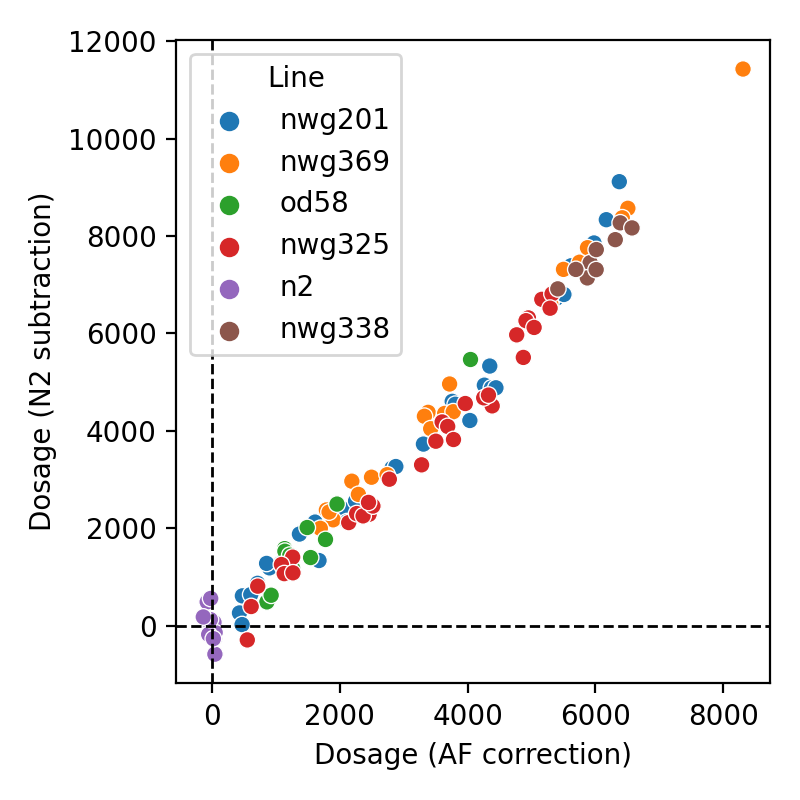

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Dosage_af', y='Dosage_sub', hue='Line', ax=ax)
ax.set_xlabel('Dosage (AF correction)')
ax.set_ylabel('Dosage (N2 subtraction)')
ax.axhline(0, linestyle='--', c='k', linewidth=1)
ax.axvline(0, linestyle='--', c='k', linewidth=1)
# ax.plot([0, 1000], [0, 1000])
fig.set_size_inches(4,4)
fig.tight_layout()

Seems to be ever so slightly nonlinear. However this is quite small and dominated by a few points. Need to look at my other datasets to see whether this is real

### Import data

In [9]:
basepaths = ['/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/Experiment', 
             '/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/N2']
paths = direcslist(basepaths, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs_gfp = [load_image(glob.glob(p + '/*488 SP 535-50*')[0]) for p in paths]
imgs_af = [load_image(glob.glob(p + '/*488 SP 630-75*')[0]) for p in paths]
imgs_red = [load_image(glob.glob(p + '/*561 SP 630-75*')[0]) for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

### Calculate means

In [10]:
expand = 5

means_gfp = [dosage(i, r, expand) for i, r in zip(imgs_gfp, rois)]
means_af = [dosage(i, r, expand) for i, r in zip(imgs_af, rois)]
means_red = [dosage(i, r, expand) for i, r in zip(imgs_red, rois)]

means = [dosage(i, r, expand) for i, r in zip(imgs, rois)]
means_flat = [dosage(i, r, expand) for i, r in zip(imgs_flat, rois)]
means_3channel = [dosage(i, r, expand) for i, r in zip(imgs_3channel, rois)]
means_3channel_flat = [dosage(i, r, expand) for i, r in zip(imgs_3channel_flat, rois)]

### Channels

<IPython.core.display.Javascript object>


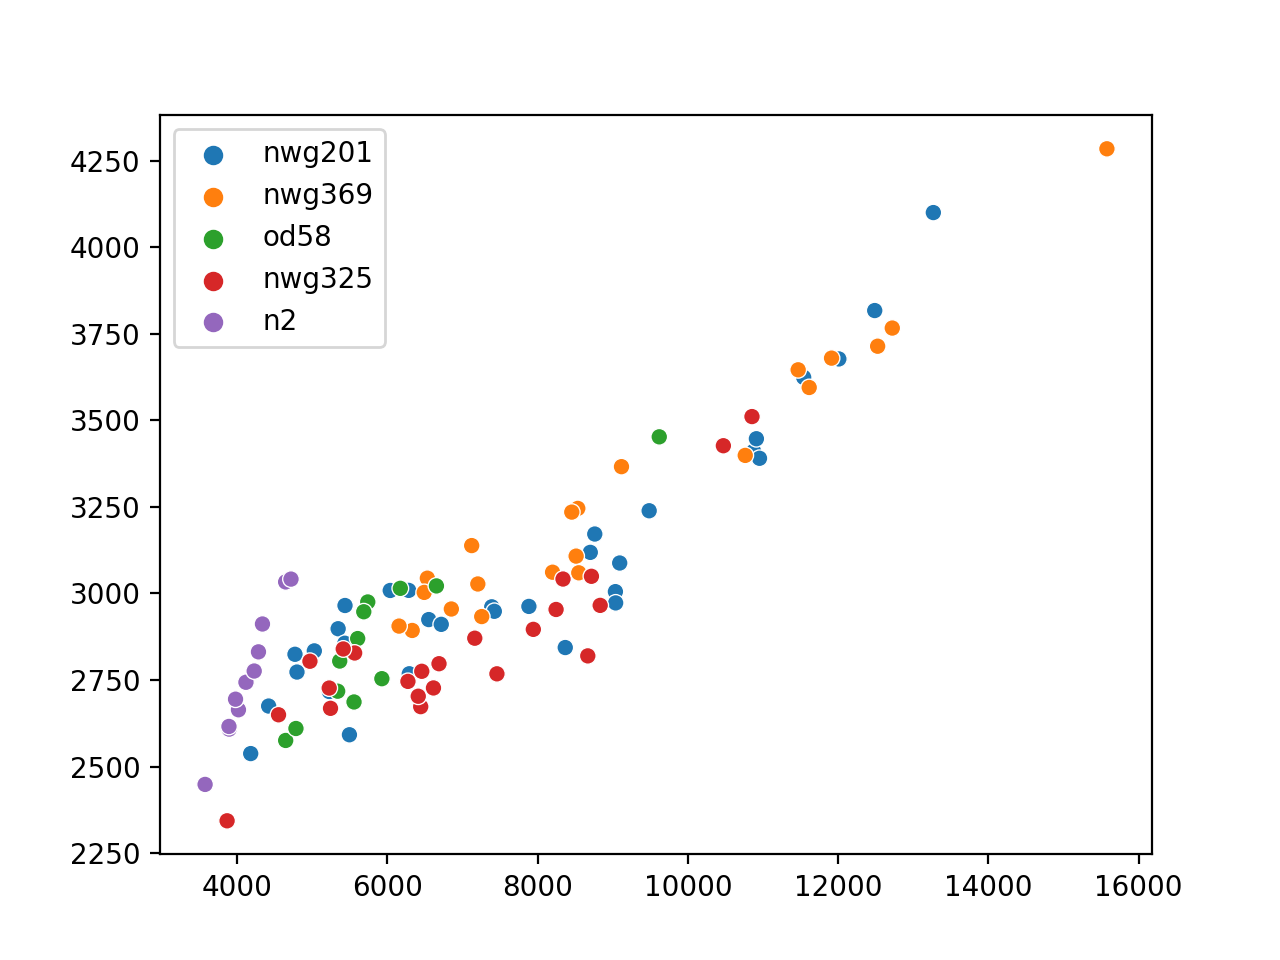

<AxesSubplot:>

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(x=means_gfp, y=means_af, hue=conditions, ax=ax)